## Read datasets

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv("cic_ids_2017_original/Wednesday-workingHours.pcap_ISCX.csv")

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       692703 non-null  object 
 1    Source IP                    692703 non-null  object 
 2    Source Port                  692703 non-null  int64  
 3    Destination IP               692703 non-null  object 
 4    Destination Port             692703 non-null  int64  
 5    Protocol                     692703 non-null  int64  
 6    Timestamp                    692703 non-null  object 
 7    Flow Duration                692703 non-null  int64  
 8    Total Fwd Packets            692703 non-null  int64  
 9    Total Backward Packets       692703 non-null  int64  
 10  Total Length of Fwd Packets   692703 non-null  int64  
 11   Total Length of Bwd Packets  692703 non-null  float64
 12   Fwd Packet Length Max        692703 non-nul

In [4]:
df1.shape

(692703, 85)

## Normalize timestamp

In [5]:
# def normalize_timestamp(ddos_data):
#     ddos_data[' Timestamp'] = pd.to_datetime(ddos_data[' Timestamp'])
#     ddos_data.sort_values(by=' Timestamp', inplace=True)

In [6]:
# normalize_timestamp(df1)

In [7]:
df1

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.14-209.48.71.168-49459-80-6,192.168.10.14,49459,209.48.71.168,80,6,5/7/2017 8:42,38308,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.3-192.168.10.17-389-49453-6,192.168.10.17,49453,192.168.10.3,389,6,5/7/2017 8:42,479,11,5,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.3-192.168.10.17-88-46124-6,192.168.10.17,46124,192.168.10.3,88,6,5/7/2017 8:42,1095,10,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.3-192.168.10.17-389-49454-6,192.168.10.17,49454,192.168.10.3,389,6,5/7/2017 8:42,15206,17,12,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.3-192.168.10.17-88-46126-6,192.168.10.17,46126,192.168.10.3,88,6,5/7/2017 8:42,1092,9,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,192.168.10.3-192.168.10.14-53-51114-17,192.168.10.14,51114,192.168.10.3,53,17,5/7/2017 12:10,32215,4,2,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
692699,192.168.10.3-192.168.10.16-53-24054-17,192.168.10.16,24054,192.168.10.3,53,17,5/7/2017 3:02,324,2,2,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
692700,192.168.10.51-23.208.163.130-58030-443-6,23.208.163.130,443,192.168.10.51,58030,6,5/7/2017 10:06,82,2,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
692701,192.168.10.3-192.168.10.14-53-51694-17,192.168.10.14,51694,192.168.10.3,53,17,5/7/2017 1:19,1048635,6,2,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


## Extract relavent rows and merge into one file

In [8]:
df1.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [9]:
# View the zero or contant valued features

for feature in df1.columns:
    unique_values = df1[feature].unique()
    if len(unique_values) == 1:
        print(f"{feature} - {unique_values}")

 Bwd PSH Flags - [0]
 Fwd URG Flags - [0]
 Bwd URG Flags - [0]
 CWE Flag Count - [0]
Fwd Avg Bytes/Bulk - [0]
 Fwd Avg Packets/Bulk - [0]
 Fwd Avg Bulk Rate - [0]
 Bwd Avg Bytes/Bulk - [0]
 Bwd Avg Packets/Bulk - [0]
Bwd Avg Bulk Rate - [0]


In [10]:
drop_columns = ['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
                ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' CWE Flag Count',
                'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate',
                ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'
      ]

In [11]:
df1.drop(columns=drop_columns, inplace=True)

In [12]:
df1.shape

(692703, 71)

## Apply preprocessing

In [13]:
# Remove non values
df1.dropna(inplace=True)

In [14]:
# Remove duplicate
df1.drop_duplicates(inplace=True)

In [15]:
df1.shape

(635005, 71)

In [16]:
df1[' Label'].value_counts()

 Label
BENIGN              435574
DoS Hulk            178179
DoS GoldenEye        10286
DoS slowloris         5692
DoS Slowhttptest      5263
Heartbleed              11
Name: count, dtype: int64

In [17]:
# Replace BENIGN with 0 and other with 1

df1.replace(to_replace=["DoS Hulk", "DoS GoldenEye", "DoS slowloris", "DoS Slowhttptest", "Heartbleed"], value=1, inplace=True)
df1.replace(to_replace=['BENIGN'], value=0, inplace=True)

/tmp/ipykernel_615201/2329808528.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace(to_replace=['BENIGN'], value=0, inplace=True)


In [18]:
df1[' Label'].value_counts()

 Label
0    435574
1    199431
Name: count, dtype: int64

In [19]:
# COnvert timestamp into unix time

from datetime import datetime

# Function to convert timestamp string to Unix timestamp
def convert_timestamp_to_int(timestamp):
    dt = datetime.strptime(timestamp, '%d/%m/%Y %H:%M')
    unix_timestamp = int(dt.timestamp())
    return unix_timestamp

# Apply the function to the 'Timestamp' column
df1[' Timestamp'] = df1[' Timestamp'].apply(convert_timestamp_to_int)

In [20]:
# Find out non binary colums

# non_binary_columns=df1.columns[df1.nunique()>2]

In [21]:
non_binary_columns = [' Timestamp']
non_binary_columns

[' Timestamp']

In [22]:
# Check for infinite
import numpy as np

is_infinite = np.any(np.isinf(df1[non_binary_columns]), axis=0)

In [23]:
is_infinite.value_counts()

False    1
Name: count, dtype: int64

In [24]:
infinite_columns = df1[non_binary_columns].columns[np.isinf(df1[non_binary_columns]).any(axis=0)]

print("Columns with infinite values:", infinite_columns.tolist())

Columns with infinite values: []


In [25]:
# Remove infinite rows
df1 = df1.replace([np.inf, -np.inf], np.nan).dropna(subset=non_binary_columns)

In [26]:
# for large

is_large = np.any(np.abs(df1[non_binary_columns]) > np.finfo(np.float64).max, axis=0)

In [27]:
is_large.value_counts()

False    1
Name: count, dtype: int64

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 635005 entries, 0 to 692702
Data columns (total 71 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             635005 non-null  int64  
 1    Protocol                     635005 non-null  int64  
 2    Timestamp                    635005 non-null  int64  
 3    Flow Duration                635005 non-null  int64  
 4    Total Fwd Packets            635005 non-null  int64  
 5    Total Backward Packets       635005 non-null  int64  
 6   Total Length of Fwd Packets   635005 non-null  int64  
 7    Total Length of Bwd Packets  635005 non-null  float64
 8    Fwd Packet Length Max        635005 non-null  int64  
 9    Fwd Packet Length Min        635005 non-null  int64  
 10   Fwd Packet Length Mean       635005 non-null  float64
 11   Fwd Packet Length Std        635005 non-null  float64
 12  Bwd Packet Length Max         635005 non-null  in

In [29]:
df1.shape

(635005, 71)

## Seperate data for Train, Validation and Testing

In [30]:
sample = df1[:300000]

In [31]:
sample[' Label'].value_counts()

 Label
1    190250
0    109750
Name: count, dtype: int64

In [32]:
train_df = sample[:240000]
# validation_df = sample[240000:256000]
test_df = sample[240000:]

In [33]:
train_df[' Label'].value_counts()

 Label
1    164025
0     75975
Name: count, dtype: int64

In [34]:
# validation_df[' Label'].value_counts()

In [35]:
test_df[' Label'].value_counts()

 Label
0    33775
1    26225
Name: count, dtype: int64

In [36]:
X_train = train_df.drop(" Label", axis=1)
y_train = train_df[" Label"]

In [37]:
# X_val = validation_df.drop(" Label", axis=1)
# y_val = validation_df[" Label"]

In [38]:
X_test = test_df.drop(" Label", axis=1)
y_test = test_df[" Label"]

In [39]:
print(X_train.shape)
print(y_train.shape)

(240000, 70)
(240000,)


In [40]:
# scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Scale only non-binary columns
X_train_scaled = X_train.copy()
X_train_scaled[non_binary_columns] = scaler.fit_transform(X_train[non_binary_columns])

# X_val_scaled = X_val.copy()
# X_val_scaled[non_binary_columns] = scaler.transform(X_val[non_binary_columns])

X_test_scaled = X_test.copy()
X_test_scaled[non_binary_columns] = scaler.transform(X_test[non_binary_columns])

In [41]:
X_train.shape

(240000, 70)

In [42]:
X_train_scaled

,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,80,6,0.753597,38308,1,1,6,6.0,6,6,...,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,389,6,0.753597,479,11,5,172,326.0,79,0,...,4,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,88,6,0.753597,1095,10,6,3150,3150.0,1575,0,...,3,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,389,6,0.753597,15206,17,12,3452,6660.0,1313,0,...,10,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,88,6,0.753597,1092,9,6,3150,3152.0,1575,0,...,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284361,80,6,0.996403,82888118,7,5,373,11595.0,373,0,...,1,32,948.0,0.0,948.0,948.0,82700000.0,0.0,82700000.0,82700000.0
284362,80,6,0.996403,83317315,5,7,422,11595.0,410,0,...,2,20,12990.0,0.0,12990.0,12990.0,83200000.0,0.0,83200000.0,83200000.0
284363,80,6,0.996403,83509156,5,6,368,11595.0,356,0,...,2,20,12999.0,0.0,12999.0,12999.0,83300000.0,0.0,83300000.0,83300000.0
284364,80,6,0.996403,82888416,7,4,349,11595.0,343,0,...,2,20,656.0,0.0,656.0,656.0,82700000.0,0.0,82700000.0,82700000.0


## Train the model, with validation

In [43]:
# LSTM Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def LSTM_model(input_size):
    # Initialize the constructor
    model = Sequential()
    
    # Add layers to the model
    model.add(LSTM(64, input_shape=(input_size, 1), return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

2024-06-30 20:34:18.596533: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-30 20:34:18.602842: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-30 20:34:18.669761: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-30 20:34:20.685973: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [44]:
model_lstm = LSTM_model(70)

/home/bishal/.local/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
history_lstm = model_lstm.fit(
    X_train_scaled, 
    y_train, 
    epochs=20, 
    batch_size=1024, 
    validation_split=0.2,
    # validation_data=(X_val, y_val), 
    # shuffle=False
)
model_lstm.save("cic_ids_2017_praharak_v7.keras")

Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 40s 207ms/step - accuracy: 0.3852 - loss: nan - val_accuracy: 0.1018 - val_loss: nan
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 49s 260ms/step - accuracy: 0.3703 - loss: nan - val_accuracy: 0.1018 - val_loss: nan
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 38s 204ms/step - accuracy: 0.3686 - loss: nan - val_accuracy: 0.1018 - val_loss: nan
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 38s 200ms/step - accuracy: 0.3704 - loss: nan - val_accuracy: 0.1018 - val_loss: nan
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 37s 199ms/step - accuracy: 0.3707 - loss: nan - val_accuracy: 0.1018 - val_loss: nan
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 38s 201ms/step - accuracy: 0.3702 - loss: nan - val_accuracy: 0.1018 - val_loss: nan
Epoch 7/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 37s 199ms/step - accuracy: 0.3704 - loss: nan - val_accuracy: 0.1018 - val_loss: nan
Epoch 8/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 37s 199ms/step - accuracy: 0.3695 - loss: nan - val_accuracy: 0.1018 - val_loss: nan


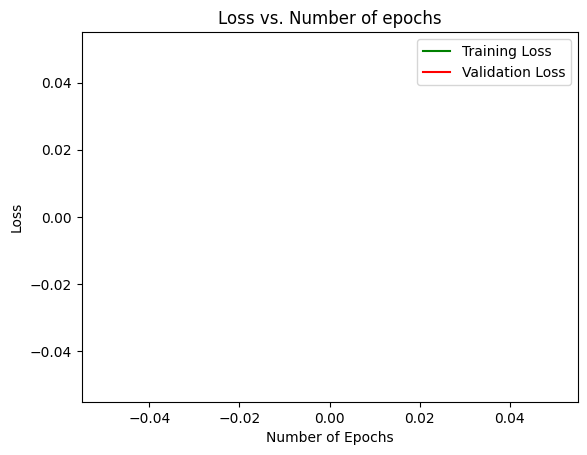

In [52]:
import matplotlib.pyplot as plt

# Retrieve training and validation loss from history object
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

# Plotting the training and validation loss
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss vs. Number of epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


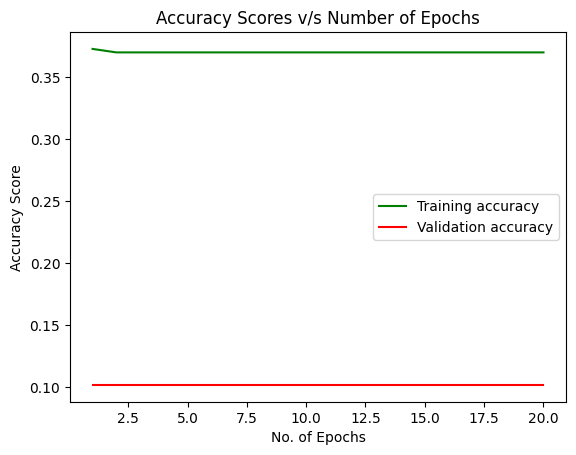

In [53]:
accuracy = history_lstm.history['accuracy']
val_accuracy = history_lstm.history['val_accuracy']
plt.plot(epochs, accuracy , 'g', label = 'Training accuracy')
plt.plot(epochs, val_accuracy , 'r', label = 'Validation accuracy')
plt.title('Accuracy Scores v/s Number of Epochs')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

## Testing and evaluation

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Generating confusion matrix
    cm = confusion_matrix(y_test, y_pred_binary)
    print("Confusion Matrix:")
    print(cm)

    # Evaluation parameters
    accuracy = accuracy_score(y_test, y_pred_binary)
    precision = precision_score(y_test, y_pred_binary)
    recall = recall_score(y_test, y_pred_binary)
    f1 = f1_score(y_test, y_pred_binary)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    return cm, y_pred

In [55]:
cm_lstm, y_pred_lstm = evaluate(model_lstm, X_test_scaled, y_test)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step
Confusion Matrix:
[[33775     0]
 [26225     0]]
Accuracy: 0.5629166666666666
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/home/bishal/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


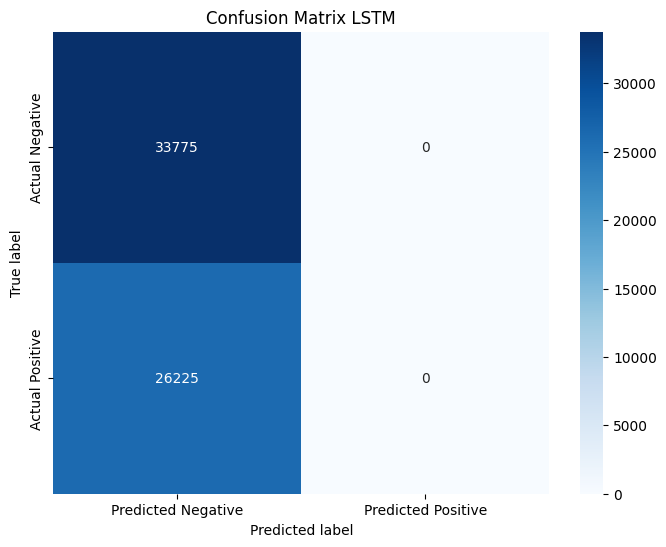

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lstm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix LSTM')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [57]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_lstm)
pr_auc = auc(recall, precision)

# Plot PR curve
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = %0.6f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve LSTM')
plt.legend(loc="lower right")
plt.show()

ValueError: Input contains NaN.